**Prediction using Supervised ML**

**Done by: Varshitha P**

In [1]:
#Import required packages
# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt



In [2]:
#Read dataset and store in a dataframe
#Extract and Store number of hours in x, and score in y

df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

#print(df.loc[2])
X=np.array(df.iloc[:,0])
x=X.reshape((-1,1))
y=np.array(df.iloc[:,1])



In [3]:
#Split x and y into training and test datasets each

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=20, random_state=42)

print('X_train: ', X_train)

X_train:  [[2.7]
 [3.3]
 [5.1]
 [3.8]
 [1.5]
 [3.2]
 [4.5]
 [8.9]
 [8.5]
 [3.5]
 [2.7]
 [1.9]
 [4.8]
 [6.1]
 [7.8]
 [5.5]
 [7.7]
 [1.1]
 [7.4]
 [9.2]]


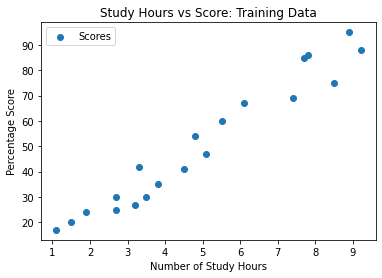

In [4]:
#Plot training data

plt.scatter(X_train,y_train)
plt.legend(['Scores'])

plt.xlabel('Number of Study Hours')
plt.ylabel('Percentage Score')
plt.title('Study Hours vs Score: Training Data')
plt.show()

In [5]:
#Model training

model=LinearRegression()
model.fit(X_train,y_train)
print('Training completed!')

print('Trained parameters...')
r_sq = model.score(X_train,y_train)
print('Coefficient of determination: ',r_sq)
print('Intercept: ',model.intercept_)
print('Slope: ',model.coef_)



Training completed!
Trained parameters...
Coefficient of determination:  0.9491209376364416
Intercept:  2.826892353899737
Slope:  [9.68207815]


In [6]:
##Model Testing: Predicting scores of test data using trained model

print('Testing data: ',X_test)

y_pred = model.predict(X_test)
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
print(df1)



Testing data:  [[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]
   Actual  Predicted
0      81  83.188141
1      30  27.032088
2      21  27.032088
3      76  69.633232
4      62  59.951153


In [7]:
#Checking prediction using metrics: Mean Absolute Error and Mean Squared Error

from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error:  3.9207511902099244
Mean Squared Error:  18.943211722315272


In [8]:
#Predict score for 9.25 study hours

y_pred1 = model.predict([[9.25]])
print('Predicted score for 9.25 study hours/day: ', y_pred1)



Predicted score for 9.25 study hours/day:  [92.38611528]


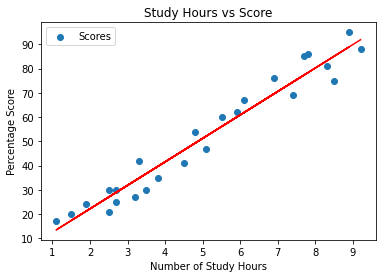

In [9]:
#Plot regressed line

Y = model.coef_*X_train + model.intercept_
plt.scatter(x,y)
plt.legend(['Scores'])
plt.plot(X_train,Y,color='r')

plt.xlabel('Number of Study Hours')
plt.ylabel('Percentage Score')
plt.title('Study Hours vs Score')
plt.show()